In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [17]:
# Pick the model you want to analyze and select the useful_metrics according to the results in Notebook 3 
ModelName = 'Hitachi HDS722020ALA330' 
useful_metrics = ['1', '5', '196']

smart_metrics = ['smart_' + x + '_normalized' for x in useful_metrics]
col_names = ['failure', 'D_from_first', 'state'] + smart_metrics

folder_name_model = ModelName.replace(' ', '_')
folder_name = 'Data/' + folder_name_model

# Load the main dataframe : df
df_survival = pd.read_csv(folder_name + '/DataFrame.csv', usecols = col_names)

df_survival.head()

,failure,smart_1_normalized,smart_5_normalized,smart_196_normalized,state,D_from_first
0,0,100.0,100.0,100.0,healthy,0
1,0,100.0,100.0,100.0,healthy,1
2,0,100.0,100.0,100.0,healthy,2
3,0,100.0,100.0,100.0,healthy,3
4,0,100.0,100.0,100.0,healthy,4


In [18]:
from lifelines import CoxPHFitter

df_survival_fail = df_survival[df_survival['state'] == 'fail']
del df_survival_fail['state']

cph = CoxPHFitter()
cph.fit(df_survival_fail[df_survival_fail['D_from_first'] > 0], duration_col='D_from_first', event_col='failure', show_progress=True, step_size = 0.1)

cph.print_summary()  # access the results using cph.summary



Iteration 1: norm_delta = 4.71488, step_size = 0.10000, ll = -1297.71769, seconds_since_start = 0.4
Iteration 2: norm_delta = 2.39624, step_size = 0.10000, ll = -1281.81434, seconds_since_start = 0.7
Iteration 3: norm_delta = 0.91864, step_size = 0.10000, ll = -1274.45952, seconds_since_start = 1.0
Iteration 4: norm_delta = 0.59054, step_size = 0.12000, ll = -1271.18731, seconds_since_start = 1.4
Iteration 5: norm_delta = 0.42829, step_size = 0.14400, ll = -1268.95702, seconds_since_start = 1.7
Iteration 6: norm_delta = 0.33219, step_size = 0.17280, ll = -1267.40463, seconds_since_start = 2.0
Iteration 7: norm_delta = 0.26543, step_size = 0.20736, ll = -1266.34253, seconds_since_start = 2.4
Iteration 8: norm_delta = 0.21289, step_size = 0.24883, ll = -1265.64509, seconds_since_start = 2.7
Iteration 9: norm_delta = 0.16775, step_size = 0.29860, ll = -1265.21486, seconds_since_start = 3.1
Iteration 10: norm_delta = 0.12711, step_size = 0.35832, ll = -1264.97171, seconds_since_start = 3.5

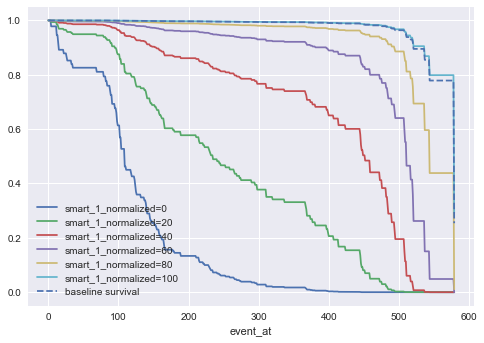

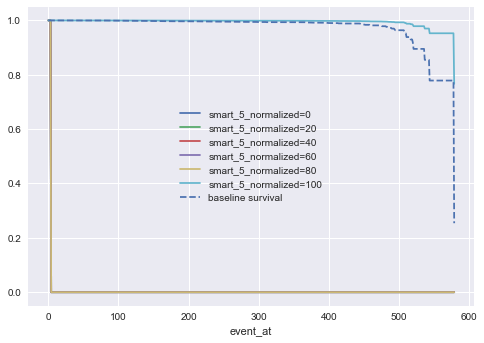

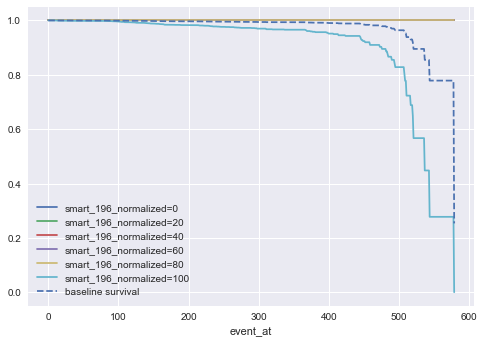

In [22]:
for sm in smart_metrics : 
    cph.plot_covariate_groups(sm, [0, 20, 40, 60, 80, 100])
    plt.show()

In [23]:
X = df_survival_fail.drop(['failure', 'D_from_first'], axis=1)

cph.predict_survival_function(X)


,8195,8196,8197,8198,8199,8200,8201,8202,8203,8204,...,2603507,2603508,2603509,2603510,2603511,2603512,2603513,2603514,2603515,2603516
event_at,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4.0,0.999962,0.999960,0.999965,0.999957,0.999957,0.999960,0.999962,0.999965,0.999954,0.999960,...,0.999967,0.999967,0.999967,0.999965,0.999967,0.999967,0.999967,0.999967,0.999967,0.999967
5.0,0.999962,0.999960,0.999965,0.999957,0.999957,0.999960,0.999962,0.999965,0.999954,0.999960,...,0.999967,0.999967,0.999967,0.999965,0.999967,0.999967,0.999967,0.999967,0.999967,0.999967
6.0,0.999962,0.999960,0.999965,0.999957,0.999957,0.999960,0.999962,0.999965,0.999954,0.999960,...,0.999967,0.999967,0.999967,0.999965,0.999967,0.999967,0.999967,0.999967,0.999967,0.999967
7.0,0.999962,0.999960,0.999965,0.999957,0.999957,0.999960,0.999962,0.999965,0.999954,0.999960,...,0.999967,0.999967,0.999967,0.999965,0.999967,0.999967,0.999967,0.999967,0.999967,0.999967
8.0,0.999962,0.999960,0.999965,0.999957,0.999957,0.999960,0.999962,0.999965,0.999954,0.999960,...,0.999967,0.999967,0.999967,0.999965,0.999967,0.999967,0.999967,0.999967,0.999967,0.999967
